In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('mlp.csv')

## Selecting the input features and the target variable

In [2]:
# Select the input features and the target variable
X = df.drop(['Time Stamp','Catalyst Type','Yield'],axis=1)
y = df['Yield']

## Spliting the data into training and testing sets

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Defining the Random Forest Regressor

In [4]:
forest = RandomForestRegressor()

## Defining the hyperparameters for tuning

In [5]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

## Performing hyperparameter tuning using GridSearchCV

In [6]:
grid_search = GridSearchCV(forest, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]})

## Getting the best hyperparameters and the corresponding model

In [7]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

## Predicting on the test set using the best model

In [8]:
y_pred = best_model.predict(X_test)

## Evaluating the model

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print("Best Hyperparameters:", best_params)

Mean Squared Error: 0.6001302312983097
R2 Score: -0.031762226916423275
Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


## Visualization

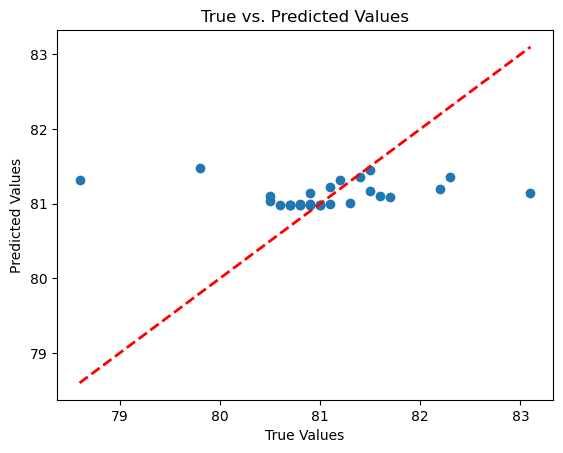

In [11]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.show()

## Residual Plot

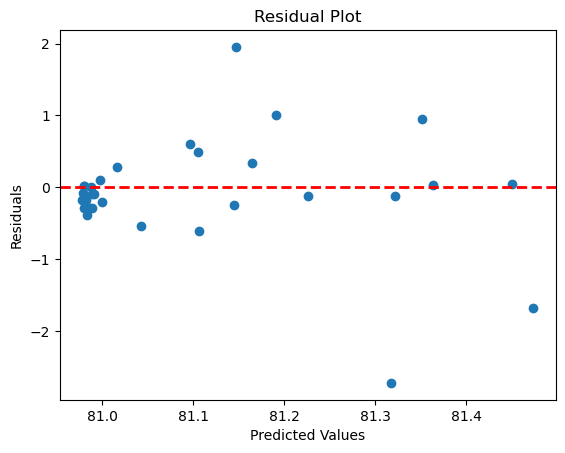

In [12]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()